In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [30]:
#1. TEXAS
# Read CSV train data
df = pd.read_csv(r"C:\Users\aravindh.saravanan\Desktop\train_ma.csv")
df['date'] = pd.to_datetime(df['date'])
df.head()

,state,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,mobility_index,positive,...,per_death,per_totalTestResults,gross,cancellations,net,cancel_rate,gross_ma,cancellations_ma,net_ma,cancel_rate.1
0,California,2020-02-15,1,1,19,1,-1,0,130.03,0,...,0.0,0.0,1985,170,1815,8.56,1989.00,116.71,1872.29,5.867988
1,California,2020-02-16,5,0,31,1,-1,-1,106.16,0,...,0.0,0.0,1771,102,1669,5.76,2006.86,119.14,1887.71,5.936788
2,California,2020-02-17,9,1,44,-12,-38,8,111.60,0,...,0.0,0.0,1591,104,1487,6.54,1971.86,121.29,1850.57,6.150837
3,California,2020-02-18,0,0,16,3,0,0,113.94,0,...,0.0,0.0,1710,109,1601,6.37,1914.29,117.29,1797.00,6.126866
4,California,2020-02-19,0,0,13,1,0,0,114.47,0,...,0.0,0.0,1800,91,1709,5.06,1831.14,113.86,1717.29,6.217819


In [31]:
texas = df[df['state']=='Texas']
texas = texas.drop("state",1)
texas = texas.drop("date",1)
texas.head()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,mobility_index,positive,hospitalizedCurrently,recovered,...,per_death,per_totalTestResults,gross,cancellations,net,cancel_rate,gross_ma,cancellations_ma,net_ma,cancel_rate.1
548,3,3,12,3,1,-1,132.12,0,0,0,...,0.0,0.0,1386,96,1290,6.93,1313.57,79.00,1234.57,6.014138
549,8,3,20,4,1,-1,99.70,0,0,0,...,0.0,0.0,987,51,936,5.17,1324.00,78.86,1245.14,5.955978
550,6,2,21,2,-18,4,108.72,0,0,0,...,0.0,0.0,960,44,916,4.58,1291.43,76.43,1215.00,5.918142
551,-1,-1,-4,3,1,0,107.64,0,0,0,...,0.0,0.0,1072,86,986,8.02,1242.00,75.71,1166.29,6.096158
552,-2,0,-12,0,3,1,107.89,0,0,0,...,0.0,0.0,1164,62,1102,5.33,1201.29,71.29,1130.00,5.934118


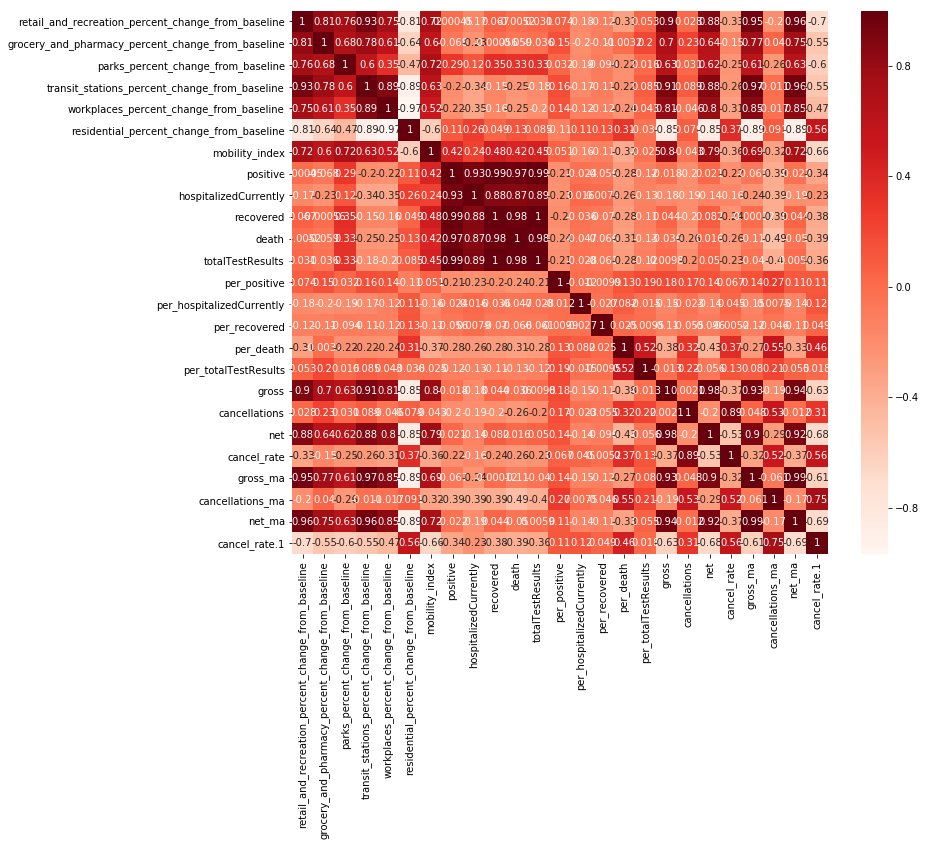

In [32]:
# Pearson Correlation
plt.figure(figsize=(12,10))
cor = texas.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [33]:
#Selecting highly correlated features with output variable
cor_target = abs(cor["gross_ma"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

retail_and_recreation_percent_change_from_baseline    0.949010
grocery_and_pharmacy_percent_change_from_baseline     0.768951
parks_percent_change_from_baseline                    0.610316
transit_stations_percent_change_from_baseline         0.968439
workplaces_percent_change_from_baseline               0.854489
residential_percent_change_from_baseline              0.894489
mobility_index                                        0.692395
gross                                                 0.928922
net                                                   0.901486
gross_ma                                              1.000000
net_ma                                                0.993707
cancel_rate.1                                         0.614777
Name: gross_ma, dtype: float64

In [48]:
# Lasso Regression with Gross Transaction
x=texas.iloc[:,0:7]
y=texas["gross_ma"]

In [49]:
# Lasso Regression
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

Best alpha using built-in LassoCV: 7.342525
Best score using built-in LassoCV: 0.970154


In [50]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 6 variables and eliminated the other 1 variables


Text(0.5,1,'Feature importance using Lasso Model')

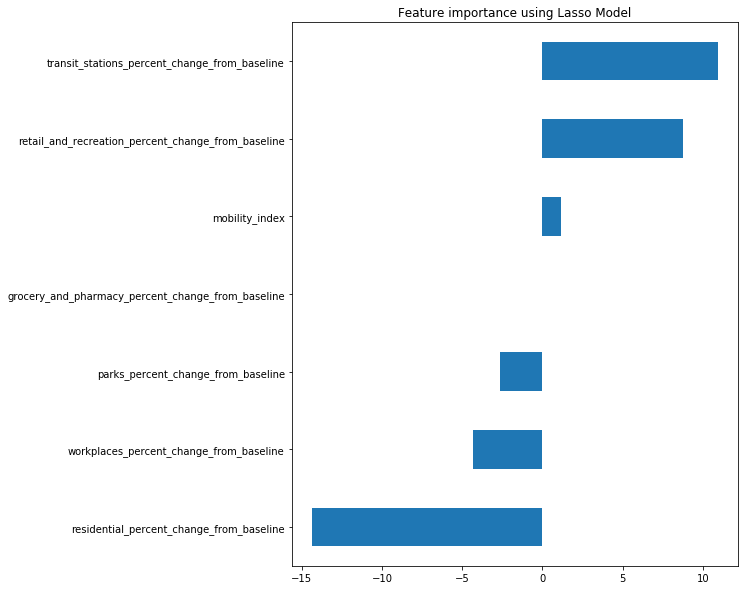

In [51]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [75]:
#Removing columns based on feature importance results
x = x.drop(["workplaces_percent_change_from_baseline"],1)
x.head()

KeyError: "['workplaces_percent_change_from_baseline'] not found in axis"

In [53]:
model = linear_model.LinearRegression()
model.fit(x, y)

coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

                                                    Coefficient
retail_and_recreation_percent_change_from_baseline    17.168369
parks_percent_change_from_baseline                    -3.139630
residential_percent_change_from_baseline             -13.125141
mobility_index                                         0.891995


In [72]:
df_test = pd.read_csv(r"C:\Users\aravindh.saravanan\Desktop\data.csv")
df_test['date'] = pd.to_datetime(df_test['date'])
texas_test = df_test[df_test['state']=='Texas']
texas_test = texas_test.drop("state",1)
texas_test = texas_test.drop("date",1)
texas_test.head(10)

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,mobility_index,positive,hospitalizedCurrently,recovered,...,per_recovered,per_death,per_totalTestResults,gross,cancellations,net,cancel_rate,gross_ma,cancellations_ma,net_ma
6321,3,3,12.0,3,1,-1,132.12,0,0,0,...,0.0,0.0,0.0,1386,96,1290,6.93,1313.57,79.00,1234.57
6322,8,3,20.0,4,1,-1,99.70,0,0,0,...,0.0,0.0,0.0,987,51,936,5.17,1324.00,78.86,1245.14
6323,6,2,21.0,2,-18,4,108.72,0,0,0,...,0.0,0.0,0.0,960,44,916,4.58,1291.43,76.43,1215.00
6324,-1,-1,-4.0,3,1,0,107.64,0,0,0,...,0.0,0.0,0.0,1072,86,986,8.02,1242.00,75.71,1166.29
6325,-2,0,-12.0,0,3,1,107.89,0,0,0,...,0.0,0.0,0.0,1164,62,1102,5.33,1201.29,71.29,1130.00
6326,-1,-2,-13.0,-1,1,1,112.02,0,0,0,...,0.0,0.0,0.0,1260,79,1181,6.27,1199.14,72.57,1126.57
6327,2,0,-2.0,2,3,-1,136.89,0,0,0,...,0.0,0.0,0.0,1390,81,1309,5.83,1174.14,71.29,1102.86
6328,3,1,13.0,3,4,-1,135.54,0,0,0,...,0.0,0.0,0.0,1276,66,1210,5.17,1158.43,67.00,1091.43
6329,4,1,-11.0,3,1,0,93.13,0,0,0,...,0.0,0.0,0.0,906,65,841,7.17,1146.86,69.00,1077.86
6330,2,1,1.0,2,3,0,106.59,0,0,0,...,0.0,0.0,0.0,1078,65,1013,6.03,1163.71,72.00,1091.71


In [74]:
x_test=texas_test.iloc[:,0:7]
x_test = x_test.drop(["workplaces_percent_change_from_baseline"],1)
y_test=texas_test["gross_ma"]

y_pred = model.predict(x_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head(10))

df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(y_test, y_pred))      
r2_value = r2_score(y_test, y_pred)                     

print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)
def MAPE(predict,target):
    return ( abs((y_test - y_pred) / y_test).mean()) * 100
print ('My MAPE: ' + str(MAPE(y_pred,y)) )

ValueError: shapes (147,4) and (6,) not aligned: 4 (dim 1) != 6 (dim 0)

In [ ]:
# 1. TEXAS
# Read CSV train data
df = pd.read_csv(r"C:\Users\aravindh.saravanan\Desktop\train_ma.csv")
df['date'] = pd.to_datetime(df['date'])

data = df[df['state']=='Texas']
data = data.drop("state",1)
data = data.drop("date",1)

# Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

#Selecting highly correlated features with output variable
cor_target = abs(cor["gross_ma"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

# Lasso Regression with Gross Transaction
x=data.iloc[:,0:7]
y=data["gross_ma"]

# Lasso Regression
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

#Removing columns based on feature importance results
x = x.drop(["workplaces_percent_change_from_baseline"],1)
x.head()

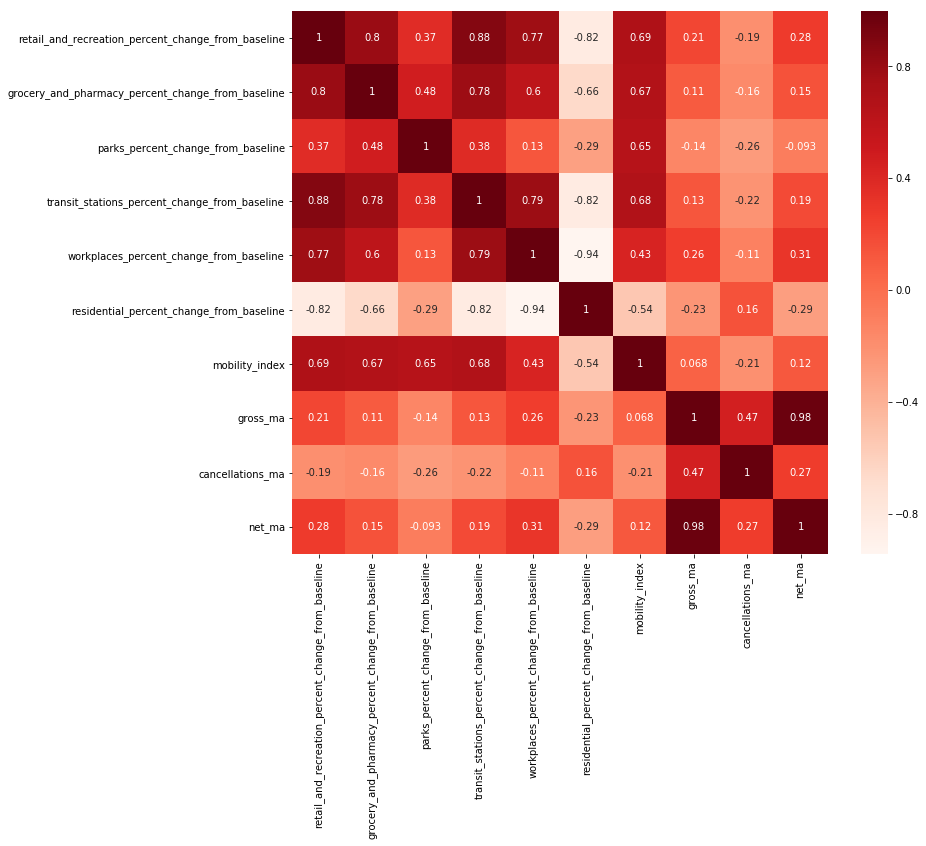

In [11]:
# Pearson Correlation
x1 = pd.read_csv(r"C:\Users\aravindh.saravanan\Desktop\corr.csv")
plt.figure(figsize=(12,10))
cor = x1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

In [13]:
cor.to_csv(r'C:\Users\aravindh.saravanan\Desktop\corr_out.csv')

C:\Users\aravindh.saravanan\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 7.342525
Best score using built-in LassoCV: 0.970154
Lasso picked 6 variables and eliminated the other 1 variables
                                                    Coefficient
retail_and_recreation_percent_change_from_baseline    10.413179
grocery_and_pharmacy_percent_change_from_baseline     -0.261759
parks_percent_change_from_baseline                    -2.308659
transit_stations_percent_change_from_baseline          8.506108
residential_percent_change_from_baseline              -6.370618
mobility_index                                         1.147570
       Actual    Predicted
6321  1313.57  1235.945852
6322  1324.00  1240.844358
6323  1291.43  1179.456875
6324  1242.00  1197.815589
6325  1201.29  1174.007875
6326  1199.14  1183.486588
6327  1174.14  1255.606983
6328  1158.43  1238.085402
6329  1146.86  1248.867338
6330  1163.71  1207.277254


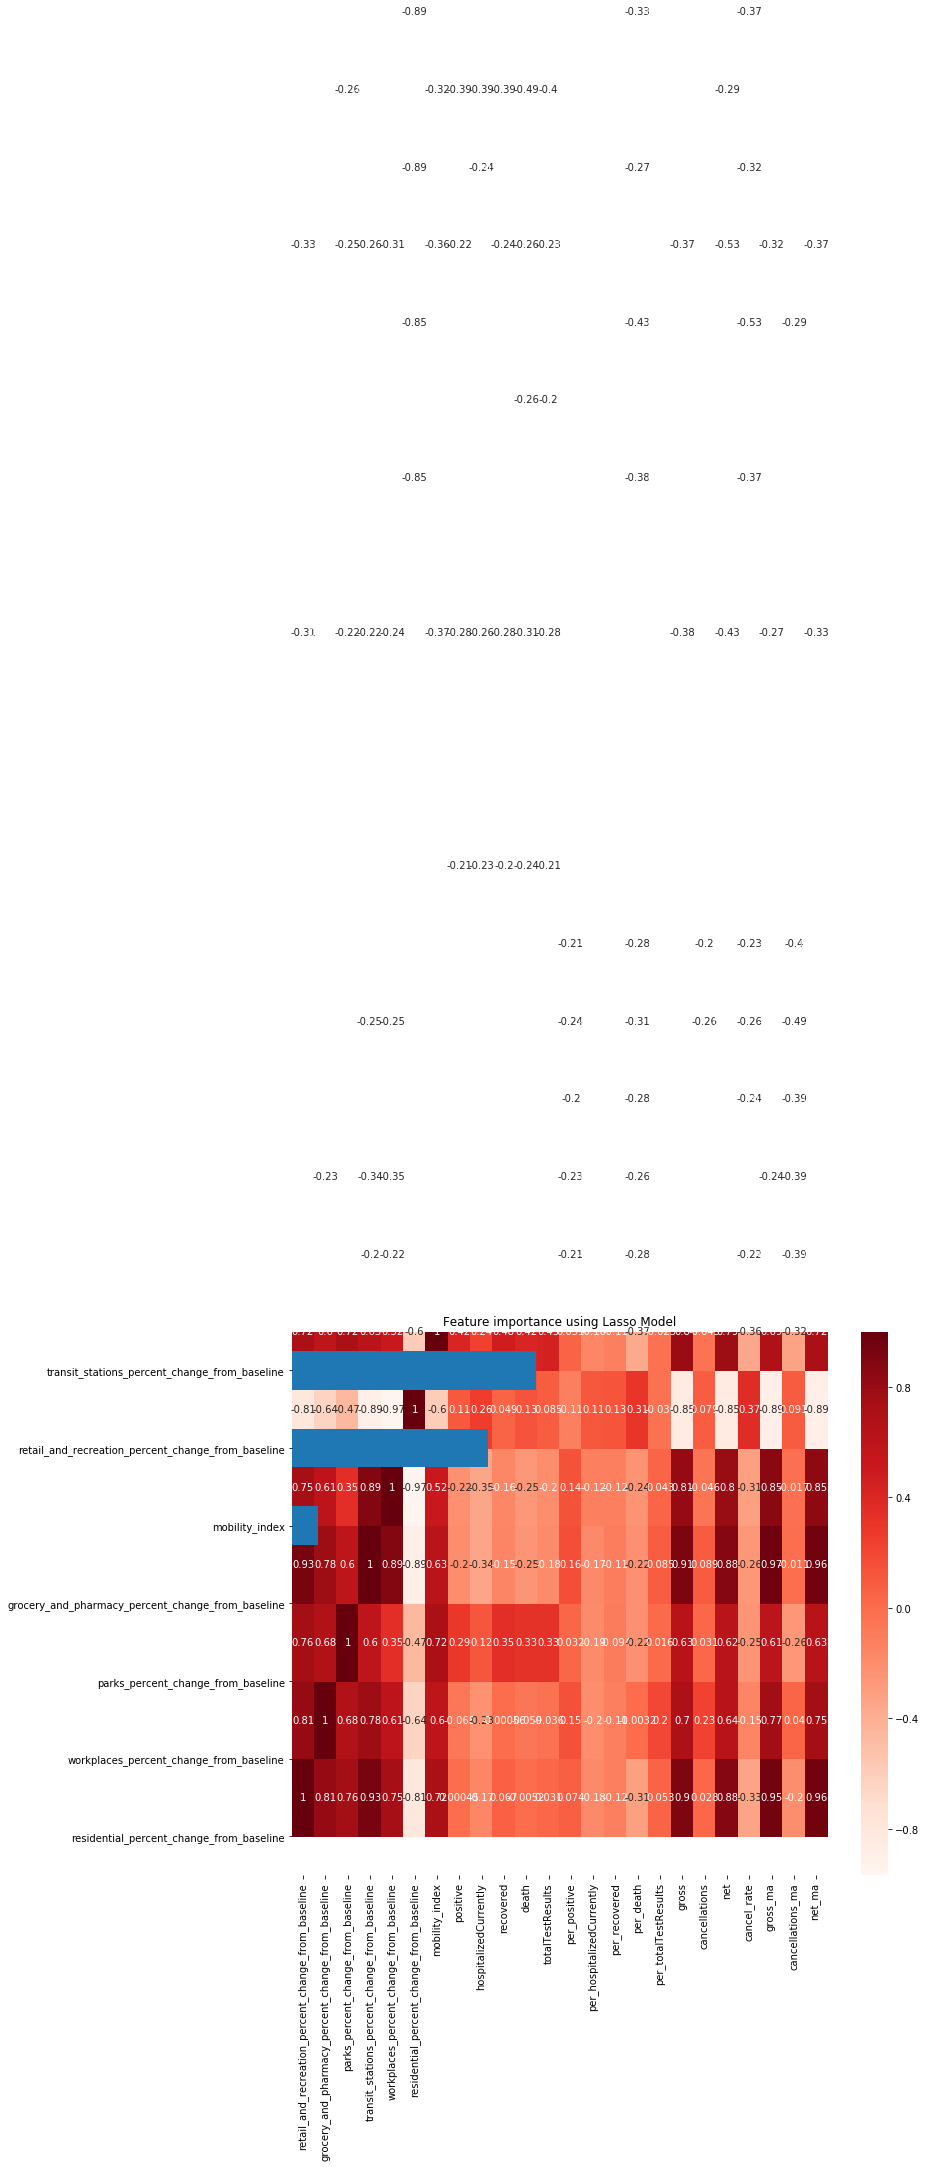

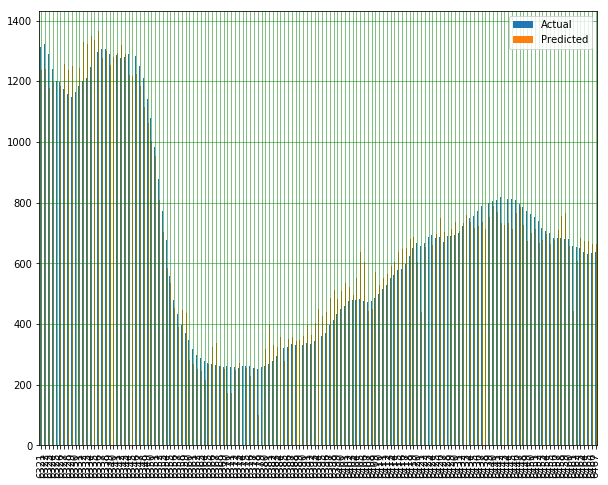

('Intercept: \n', 1049.6896023823867)
('Root Mean Square Error \n', 64.5877397006349)
('R^2 Value: \n', 0.9629072513833876)
My MAPE: 9.68168585483


In [2]:
model = linear_model.LinearRegression()
model.fit(x, y)

coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

df_test = pd.read_csv(r"C:\Users\aravindh.saravanan\Desktop\data.csv")
df_test['date'] = pd.to_datetime(df_test['date'])
data_test = df_test[df_test['state']=='Texas']
data_test = data_test.drop("state",1)
data_test = data_test.drop("date",1)
data_test.head(10)

x_test=data_test.iloc[:,0:7]
x_test = x_test.drop(["workplaces_percent_change_from_baseline"],1)
y_test=data_test["gross_ma"]

y_pred = model.predict(x_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head(10))

df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(y_test, y_pred))      
r2_value = r2_score(y_test, y_pred)                     

print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)

def MAPE(predict,target):
    return ( abs((y_test - y_pred) / y_test).mean()) * 100
print ('My MAPE: ' + str(MAPE(y_pred,y)) )

In [ ]:
# 2. CALIFORNIA
# Read CSV train data
df = pd.read_csv(r"C:\Users\aravindh.saravanan\Desktop\train_ma.csv")
df['date'] = pd.to_datetime(df['date'])

data = df[df['state']=='California']
data = data.drop("state",1)
data = data.drop("date",1)

# Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

#Selecting highly correlated features with output variable
cor_target = abs(cor["gross_ma"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

# Lasso Regression with Gross Transaction
x=data.iloc[:,0:7]
y=data["gross_ma"]

# Lasso Regression
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

#Removing columns based on feature importance results
x = x.drop(["workplaces_percent_change_from_baseline"],1)
x.head()

model = linear_model.LinearRegression()
model.fit(x, y)

coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

In [15]:
df_test = pd.read_csv(r"C:\Users\aravindh.saravanan\Desktop\forecast.csv")
df_test['date'] = pd.to_datetime(df_test['date'])
data_test = df_test[df_test['state']=='California']
data_test = data_test.drop("state",1)
data_test = data_test.drop("date",1)
data_test.head(10)

x_test=data_test.iloc[:,0:7]
#x_test = x_test.drop(["workplaces_percent_change_from_baseline"],1)
y_test=data_test["gross_ma"]

y_pred = model.predict(x_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head(10))

df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(y_test, y_pred))      
r2_value = r2_score(y_test, y_pred)                     

print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)

def MAPE(predict,target):
    return ( abs((y_test - y_pred) / y_test).mean()) * 100
print ('My MAPE: ' + str(MAPE(y_pred,y)) )

ValueError: shapes (4,7) and (6,) not aligned: 7 (dim 1) != 6 (dim 0)

Best alpha using built-in LassoCV: 10.470871
Best score using built-in LassoCV: 0.981649
Lasso picked 6 variables and eliminated the other 1 variables
                                                    Coefficient
retail_and_recreation_percent_change_from_baseline     2.011851
grocery_and_pharmacy_percent_change_from_baseline     -1.883239
parks_percent_change_from_baseline                    -1.232737
transit_stations_percent_change_from_baseline         17.942842
residential_percent_change_from_baseline             -12.335078
mobility_index                                         0.245093
    Actual   Predicted
90  596.29  681.916093
91  596.43  726.822909
92  598.43  503.879814
93  575.00  430.359426
94  569.43  605.393804
95  561.86  647.270030
96  559.00  649.978211
97  548.00  629.728845
98  536.57  624.631674
99  530.57  568.046232


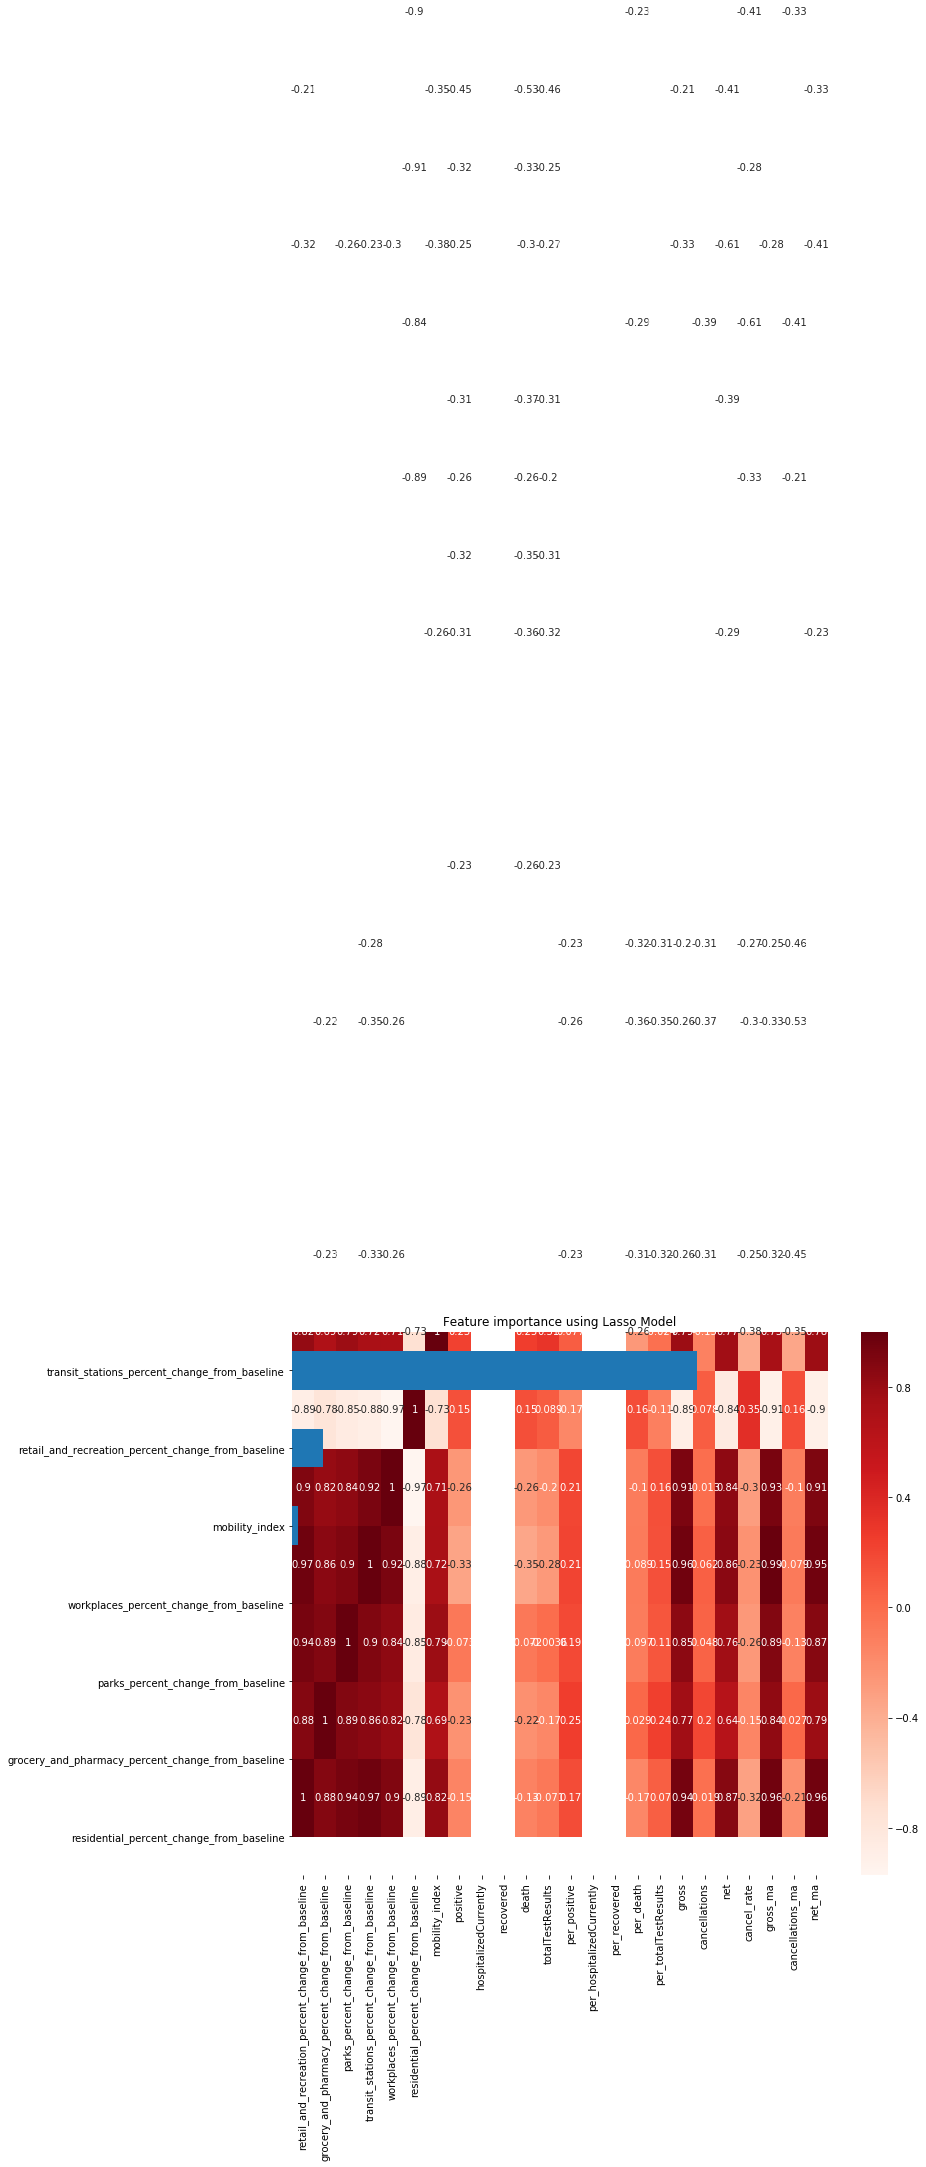

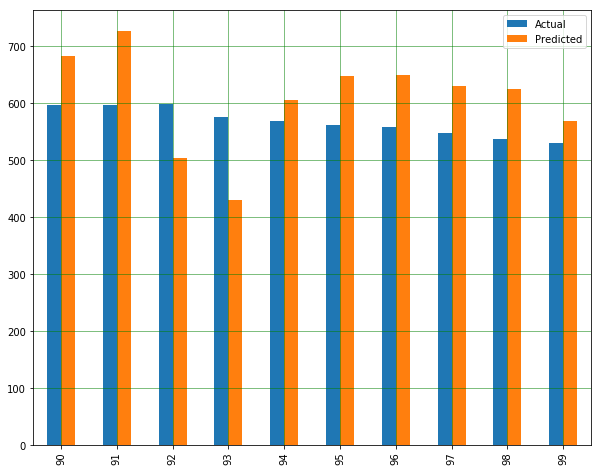

('Intercept: \n', 1456.0324960243297)
('Root Mean Square Error \n', 93.21963603923429)
('R^2 Value: \n', -14.83991269583156)
My MAPE: 15.3358233136


In [59]:
# 3. FLORIDA
# Read CSV train data
df = pd.read_csv(r"C:\Users\aravindh.saravanan\Desktop\train_ma.csv")
df['date'] = pd.to_datetime(df['date'])

data = df[df['state']=='Florida']
data = data.drop("state",1)
data = data.drop("date",1)

# Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

#Selecting highly correlated features with output variable
cor_target = abs(cor["gross_ma"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

# Lasso Regression with Gross Transaction
x=data.iloc[:,0:7]
y=data["gross_ma"]

# Lasso Regression
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

#Removing columns based on feature importance results
x = x.drop(["workplaces_percent_change_from_baseline"],1)
x.head()

model = linear_model.LinearRegression()
model.fit(x, y)

coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

df_test = pd.read_csv(r"C:\Users\aravindh.saravanan\Desktop\test_ma.csv")
df_test['date'] = pd.to_datetime(df_test['date'])
data_test = df_test[df_test['state']=='Florida']
data_test = data_test.drop("state",1)
data_test = data_test.drop("date",1)
data_test.head(10)

x_test=data_test.iloc[:,0:7]
x_test = x_test.drop(["workplaces_percent_change_from_baseline"],1)
y_test=data_test["gross_ma"]

y_pred = model.predict(x_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head(10))

df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(y_test, y_pred))      
r2_value = r2_score(y_test, y_pred)                     

print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)

def MAPE(predict,target):
    return ( abs((y_test - y_pred) / y_test).mean()) * 100
print ('My MAPE: ' + str(MAPE(y_pred,y)) )

Best alpha using built-in LassoCV: 3.224893
Best score using built-in LassoCV: 0.966682
Lasso picked 7 variables and eliminated the other 0 variables
                                                    Coefficient
retail_and_recreation_percent_change_from_baseline     5.578038
grocery_and_pharmacy_percent_change_from_baseline     -1.083590
parks_percent_change_from_baseline                    -0.882080
transit_stations_percent_change_from_baseline          3.622960
residential_percent_change_from_baseline              -2.433428
mobility_index                                        -0.520883
     Actual   Predicted
130  348.00  315.566498
131  358.29  326.091766
132  365.57  248.636840
133  360.57  134.200147
134  365.86  267.238101
135  367.43  290.037331
136  365.57  290.734564
137  356.71  293.802677
138  354.57  283.831700
139  351.71  262.107928


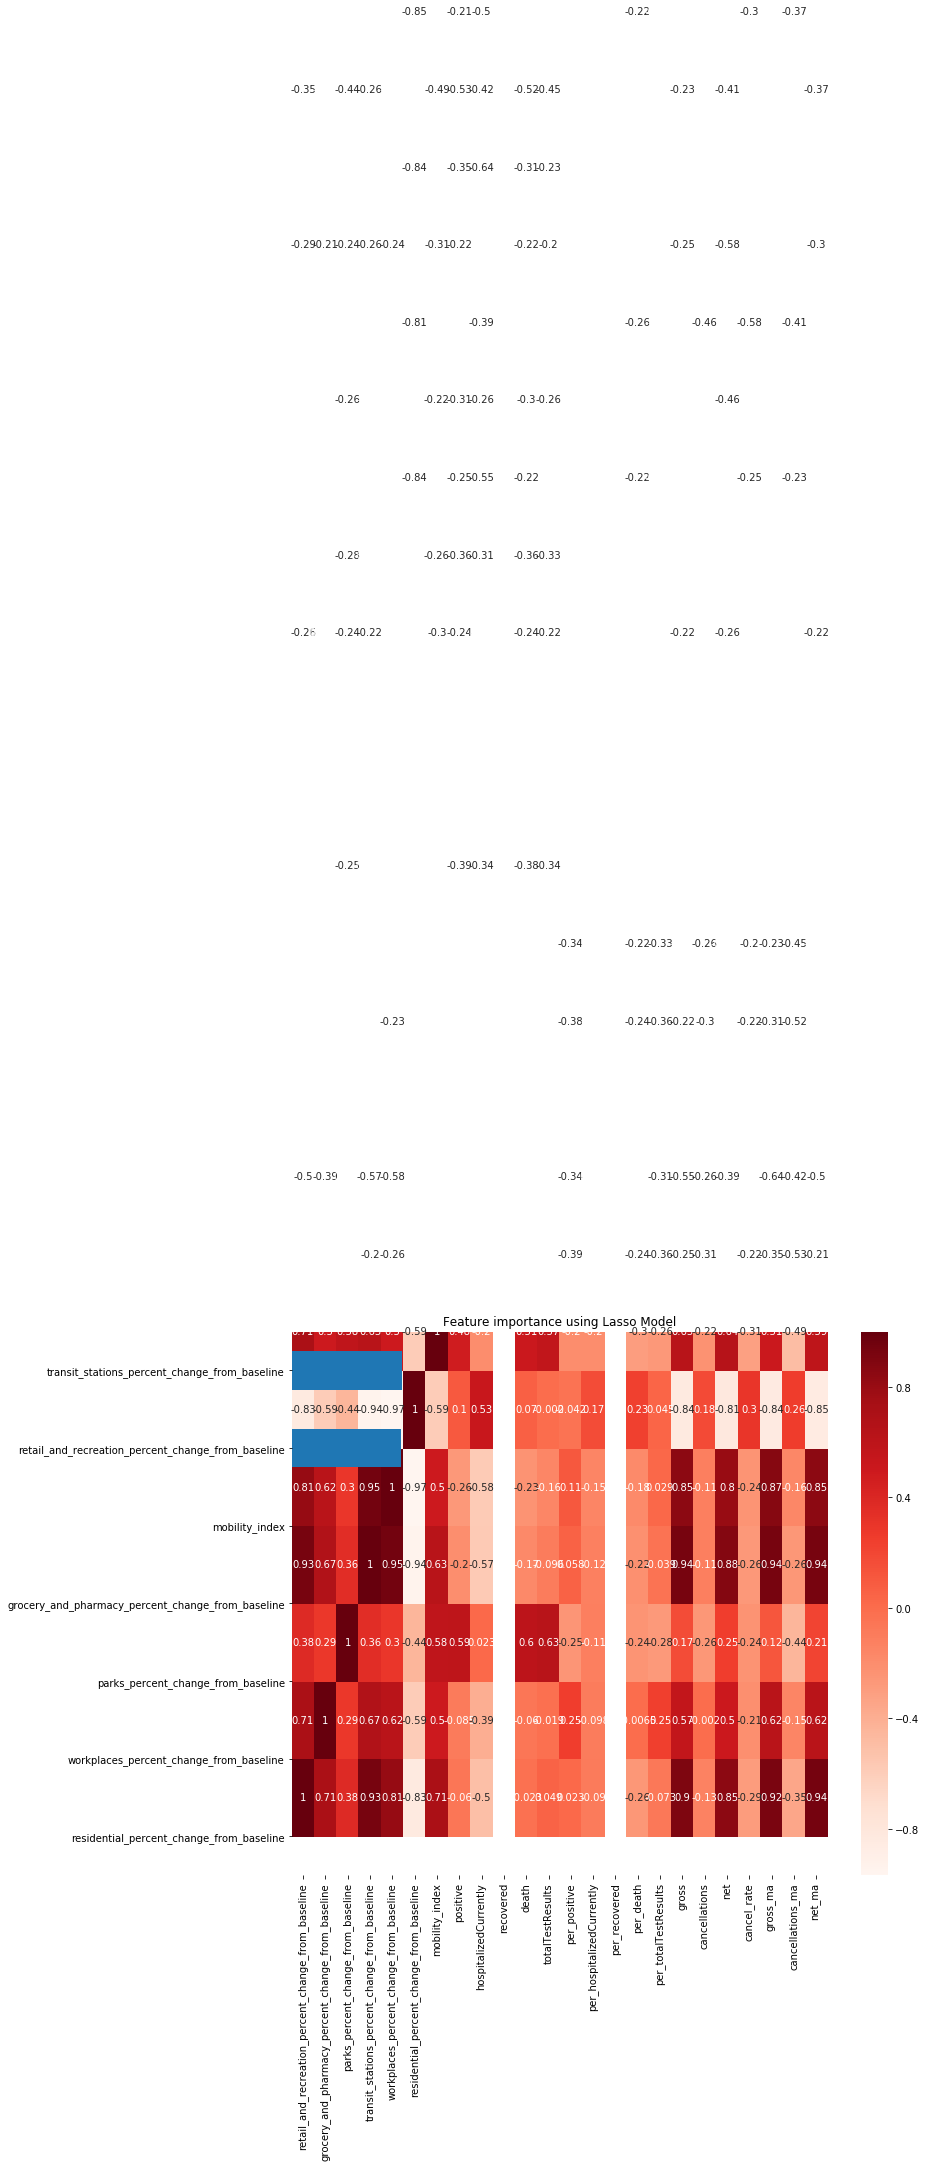

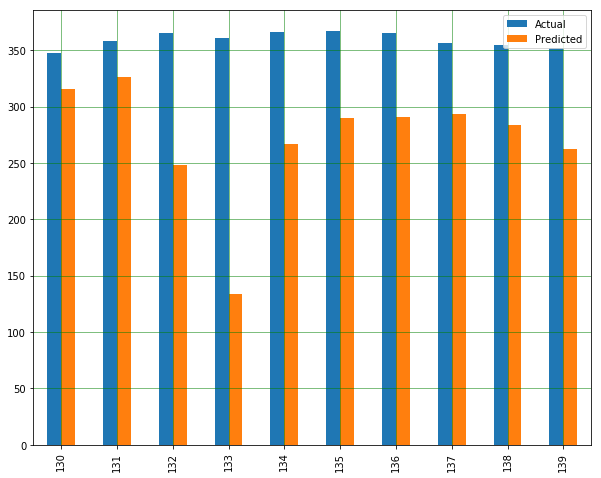

('Intercept: \n', 626.8591050645011)
('Root Mean Square Error \n', 102.62131792560395)
('R^2 Value: \n', -259.2821602600788)
My MAPE: 24.4626566422


In [63]:
# 4. ILLINOIS
# Read CSV train data
df = pd.read_csv(r"C:\Users\aravindh.saravanan\Desktop\train_ma.csv")
df['date'] = pd.to_datetime(df['date'])

data = df[df['state']=='Illinois']
data = data.drop("state",1)
data = data.drop("date",1)

# Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

#Selecting highly correlated features with output variable
cor_target = abs(cor["gross_ma"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

# Lasso Regression with Gross Transaction
x=data.iloc[:,0:7]
y=data["gross_ma"]

# Lasso Regression
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

#Removing columns based on feature importance results
x = x.drop(["workplaces_percent_change_from_baseline"],1)
x.head()

model = linear_model.LinearRegression()
model.fit(x, y)

coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

df_test = pd.read_csv(r"C:\Users\aravindh.saravanan\Desktop\test_ma.csv")
df_test['date'] = pd.to_datetime(df_test['date'])
data_test = df_test[df_test['state']=='Illinois']
data_test = data_test.drop("state",1)
data_test = data_test.drop("date",1)
data_test.head(10)

x_test=data_test.iloc[:,0:7]
x_test = x_test.drop(["workplaces_percent_change_from_baseline"],1)
y_test=data_test["gross_ma"]

y_pred = model.predict(x_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head(10))

df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(y_test, y_pred))      
r2_value = r2_score(y_test, y_pred)                     

print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)

def MAPE(predict,target):
    return ( abs((y_test - y_pred) / y_test).mean()) * 100
print ('My MAPE: ' + str(MAPE(y_pred,y)) )

Best alpha using built-in LassoCV: 2.576507
Best score using built-in LassoCV: 0.946537
Lasso picked 7 variables and eliminated the other 0 variables
                                                    Coefficient
retail_and_recreation_percent_change_from_baseline     3.161838
grocery_and_pharmacy_percent_change_from_baseline     -1.130690
parks_percent_change_from_baseline                    -0.453941
transit_stations_percent_change_from_baseline          2.817412
residential_percent_change_from_baseline              -3.809016
mobility_index                                         0.498516
     Actual   Predicted
100  331.57  312.900884
101  342.71  329.687646
102  349.29  251.465280
103  336.43  194.982411
104  342.57  281.976298
105  343.71  282.411362
106  337.57  271.170419
107  337.00  285.018907
108  334.43  286.528792
109  337.00  281.624594


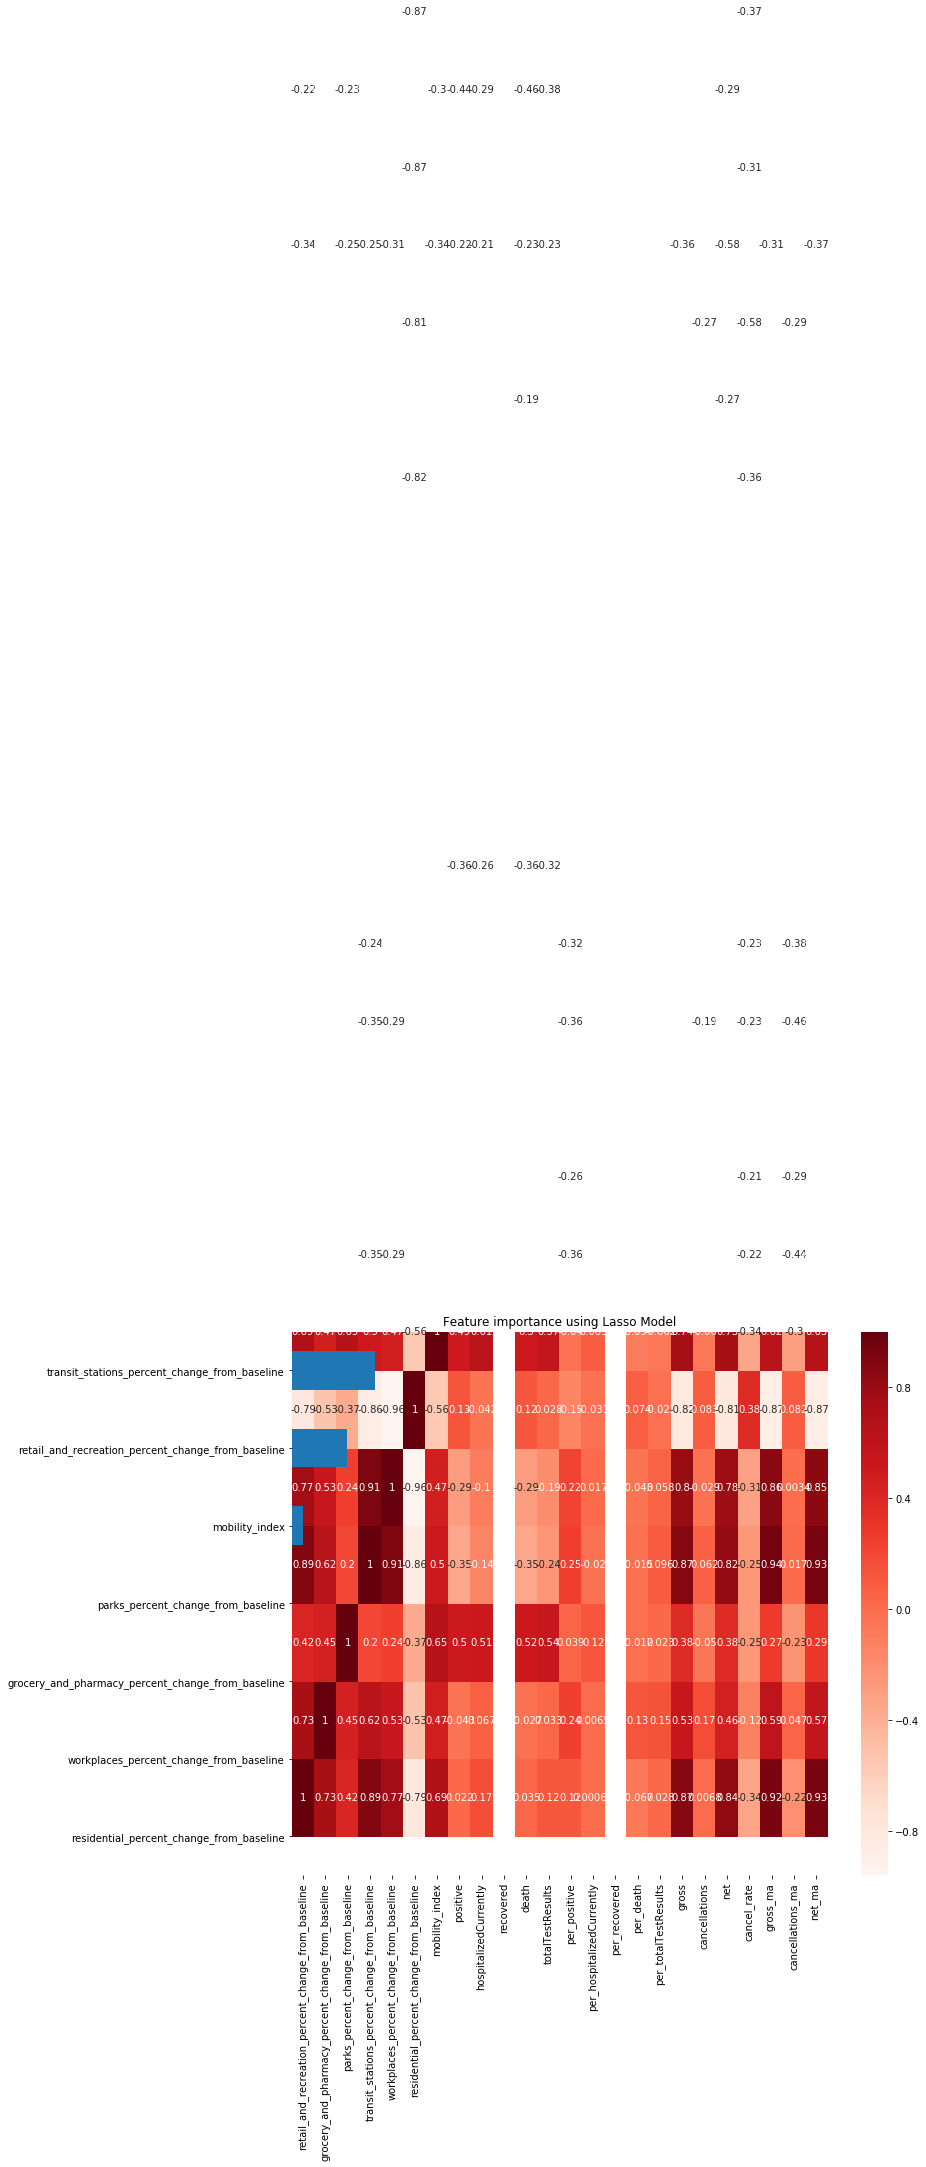

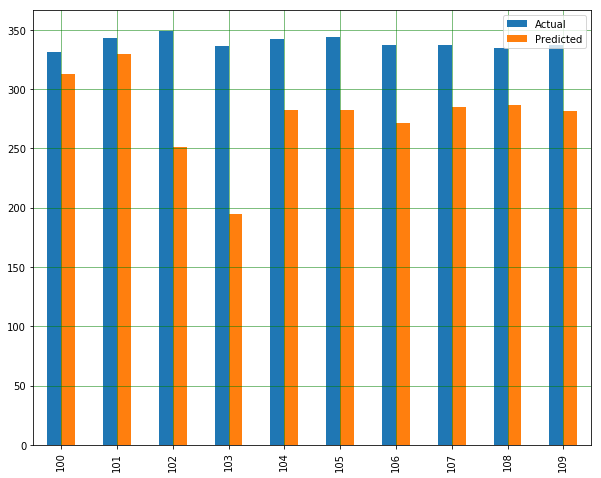

('Intercept: \n', 390.4637993109395)
('Root Mean Square Error \n', 70.70801464715679)
('R^2 Value: \n', -201.58042624765457)
My MAPE: 18.0852782255


In [65]:
# 5. GEORGIA
# Read CSV train data
df = pd.read_csv(r"C:\Users\aravindh.saravanan\Desktop\train_ma.csv")
df['date'] = pd.to_datetime(df['date'])

data = df[df['state']=='Georgia']
data = data.drop("state",1)
data = data.drop("date",1)

# Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

#Selecting highly correlated features with output variable
cor_target = abs(cor["gross_ma"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

# Lasso Regression with Gross Transaction
x=data.iloc[:,0:7]
y=data["gross_ma"]

# Lasso Regression
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

#Removing columns based on feature importance results
x = x.drop(["workplaces_percent_change_from_baseline"],1)
x.head()

model = linear_model.LinearRegression()
model.fit(x, y)

coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

df_test = pd.read_csv(r"C:\Users\aravindh.saravanan\Desktop\test_ma.csv")
df_test['date'] = pd.to_datetime(df_test['date'])
data_test = df_test[df_test['state']=='Georgia']
data_test = data_test.drop("state",1)
data_test = data_test.drop("date",1)
data_test.head(10)

x_test=data_test.iloc[:,0:7]
x_test = x_test.drop(["workplaces_percent_change_from_baseline"],1)
y_test=data_test["gross_ma"]

y_pred = model.predict(x_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head(10))

df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(y_test, y_pred))      
r2_value = r2_score(y_test, y_pred)                     

print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)

def MAPE(predict,target):
    return ( abs((y_test - y_pred) / y_test).mean()) * 100
print ('My MAPE: ' + str(MAPE(y_pred,y)) )

Best alpha using built-in LassoCV: 34.556275
Best score using built-in LassoCV: 0.937207
Lasso picked 6 variables and eliminated the other 1 variables
                                                    Coefficient
retail_and_recreation_percent_change_from_baseline     4.410893
grocery_and_pharmacy_percent_change_from_baseline      0.611634
parks_percent_change_from_baseline                    -0.624874
transit_stations_percent_change_from_baseline          2.999529
residential_percent_change_from_baseline              -5.993050
mobility_index                                         0.069913
     Actual   Predicted
280  299.43  302.965512
281  306.29  313.706947
282  309.29  255.417705
283  301.71  208.876523
284  309.86  260.353303
285  308.86  279.679457
286  300.00  278.222963
287  293.29  269.546714
288  281.00  257.518216
289  277.14  232.391921


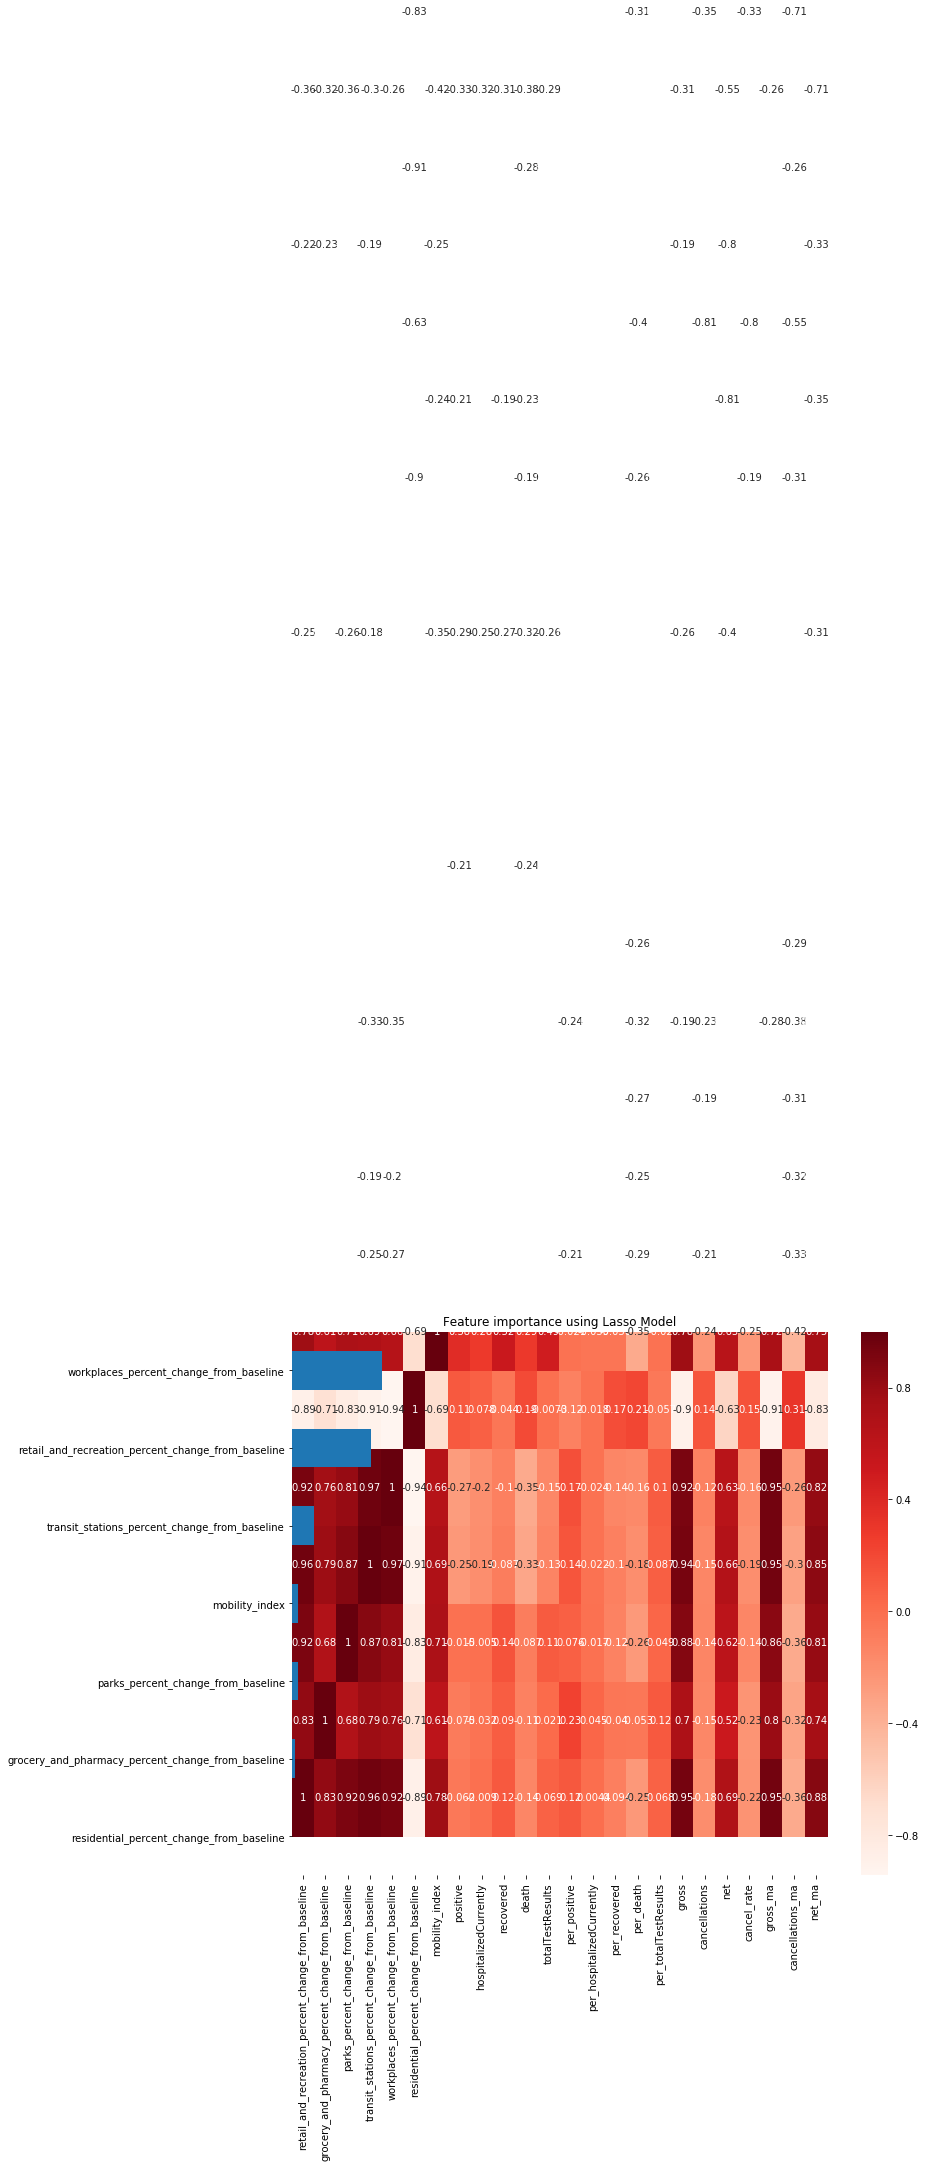

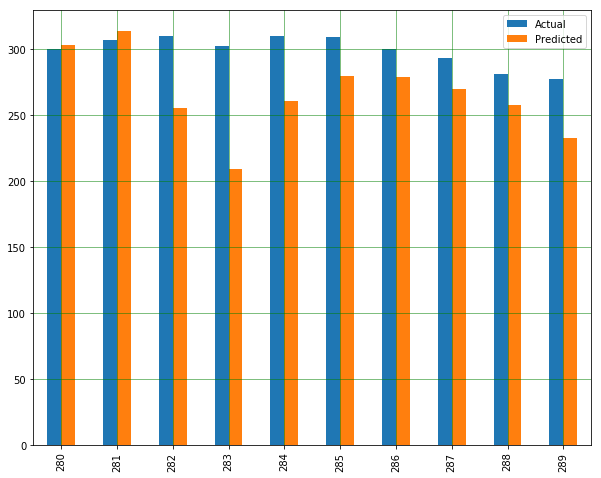

('Intercept: \n', 462.7066925407662)
('Root Mean Square Error \n', 42.990666930765)
('R^2 Value: \n', -14.196487585068068)
My MAPE: 11.7071789741


In [67]:
# 6. Nevada
# Read CSV train data
df = pd.read_csv(r"C:\Users\aravindh.saravanan\Desktop\train_ma.csv")
df['date'] = pd.to_datetime(df['date'])

data = df[df['state']=='Nevada']
data = data.drop("state",1)
data = data.drop("date",1)

# Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

#Selecting highly correlated features with output variable
cor_target = abs(cor["gross_ma"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

# Lasso Regression with Gross Transaction
x=data.iloc[:,0:7]
y=data["gross_ma"]

# Lasso Regression
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

#Removing columns based on feature importance results
x = x.drop(["workplaces_percent_change_from_baseline"],1)
x.head()

model = linear_model.LinearRegression()
model.fit(x, y)

coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

df_test = pd.read_csv(r"C:\Users\aravindh.saravanan\Desktop\test_ma.csv")
df_test['date'] = pd.to_datetime(df_test['date'])
data_test = df_test[df_test['state']=='Nevada']
data_test = data_test.drop("state",1)
data_test = data_test.drop("date",1)
data_test.head(10)

x_test=data_test.iloc[:,0:7]
x_test = x_test.drop(["workplaces_percent_change_from_baseline"],1)
y_test=data_test["gross_ma"]

y_pred = model.predict(x_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head(10))

df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(y_test, y_pred))      
r2_value = r2_score(y_test, y_pred)                     

print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)

def MAPE(predict,target):
    return ( abs((y_test - y_pred) / y_test).mean()) * 100
print ('My MAPE: ' + str(MAPE(y_pred,y)) )

Best alpha using built-in LassoCV: 2.088393
Best score using built-in LassoCV: 0.965949
Lasso picked 7 variables and eliminated the other 0 variables
                                                    Coefficient
retail_and_recreation_percent_change_from_baseline     2.794520
grocery_and_pharmacy_percent_change_from_baseline     -1.108233
parks_percent_change_from_baseline                    -0.272948
transit_stations_percent_change_from_baseline          2.262271
residential_percent_change_from_baseline              -1.088654
mobility_index                                         0.207210
     Actual   Predicted
380  276.57  250.541840
381  287.86  252.558073
382  294.71  197.694678
383  289.57  134.238114
384  286.14  223.333077
385  285.00  227.604562
386  276.86  241.602918
387  274.00  239.070748
388  273.14  232.929204
389  270.57  205.047995


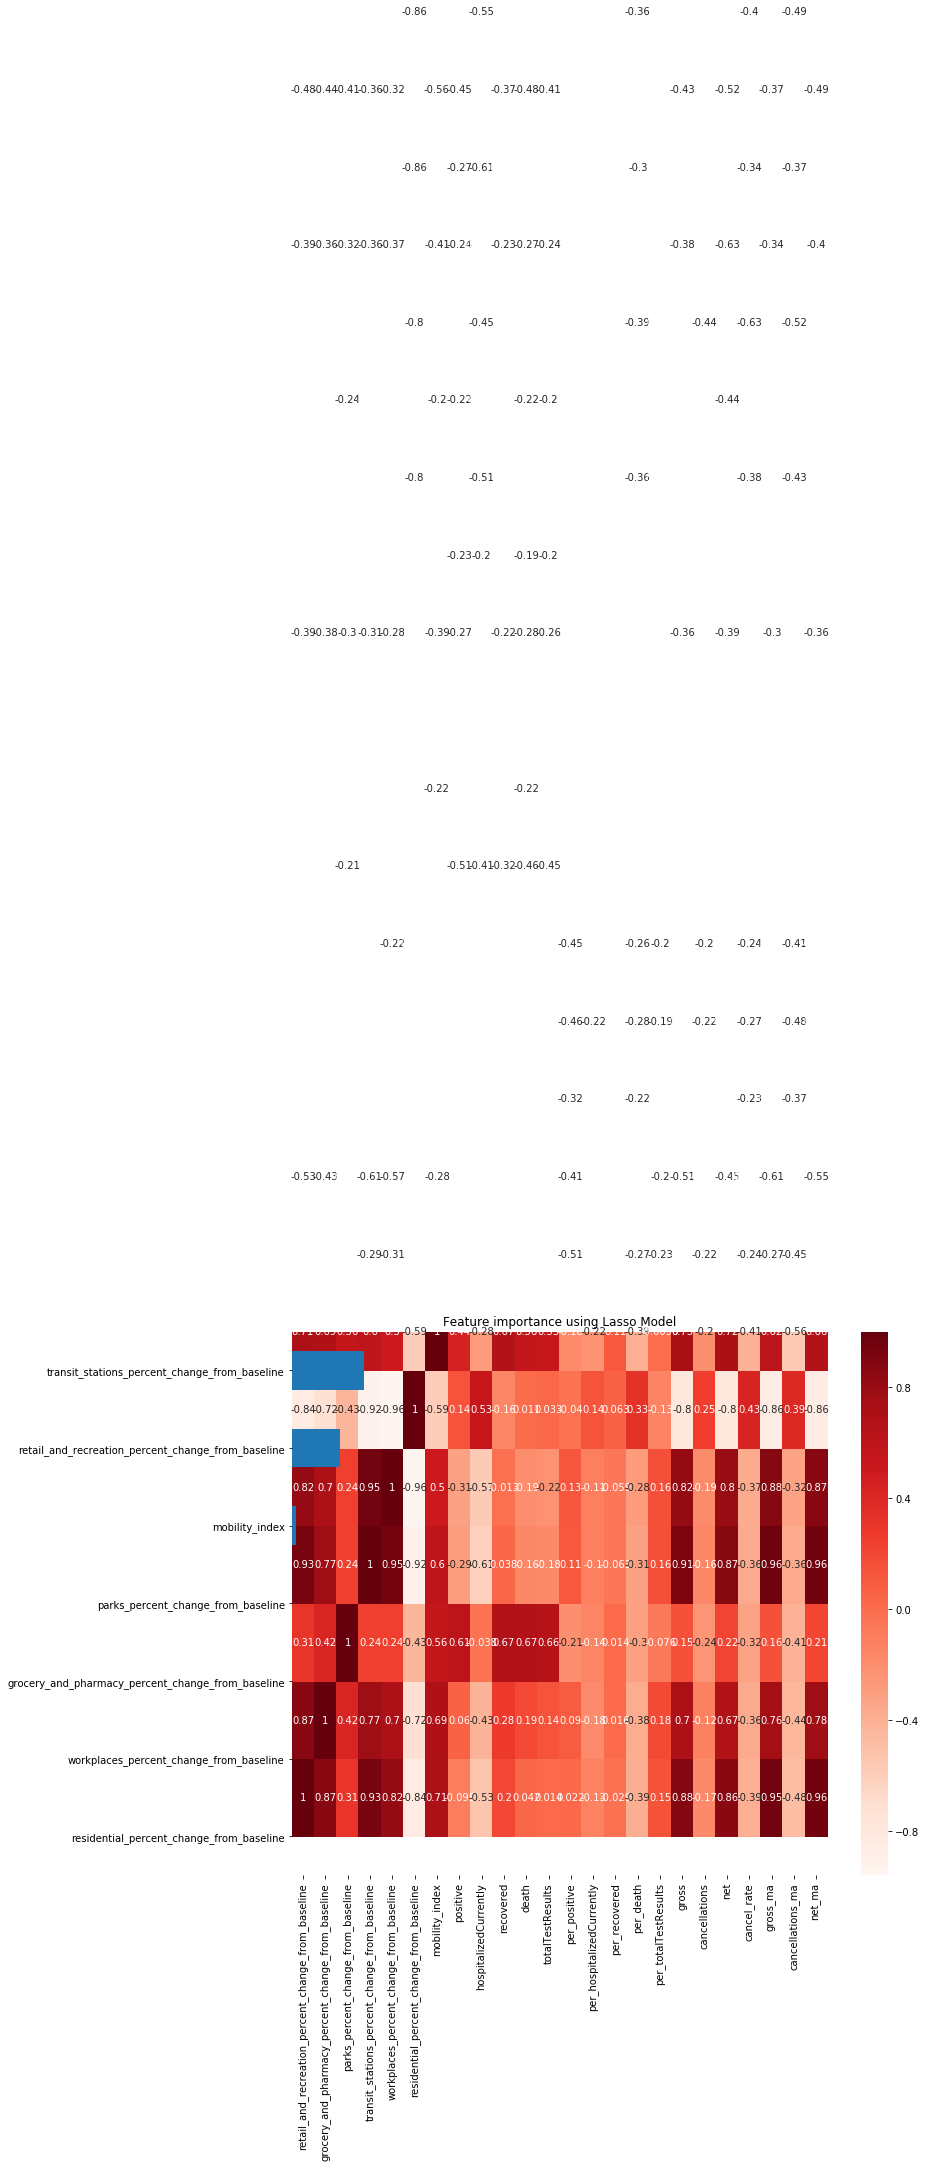

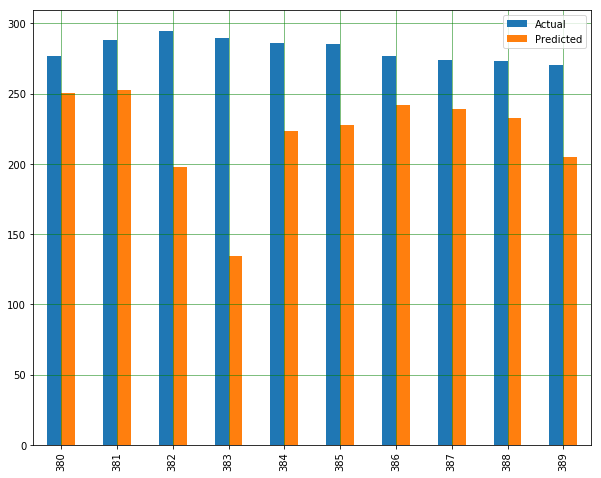

('Intercept: \n', 330.204721403628)
('Root Mean Square Error \n', 71.46730745405493)
('R^2 Value: \n', -83.38598277306532)
My MAPE: 21.4744761249


In [68]:
# 7. Pennsylvania
# Read CSV train data
df = pd.read_csv(r"C:\Users\aravindh.saravanan\Desktop\train_ma.csv")
df['date'] = pd.to_datetime(df['date'])

data = df[df['state']=='Pennsylvania']
data = data.drop("state",1)
data = data.drop("date",1)

# Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

#Selecting highly correlated features with output variable
cor_target = abs(cor["gross_ma"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

# Lasso Regression with Gross Transaction
x=data.iloc[:,0:7]
y=data["gross_ma"]

# Lasso Regression
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

#Removing columns based on feature importance results
x = x.drop(["workplaces_percent_change_from_baseline"],1)
x.head()

model = linear_model.LinearRegression()
model.fit(x, y)

coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

df_test = pd.read_csv(r"C:\Users\aravindh.saravanan\Desktop\test_ma.csv")
df_test['date'] = pd.to_datetime(df_test['date'])
data_test = df_test[df_test['state']=='Pennsylvania']
data_test = data_test.drop("state",1)
data_test = data_test.drop("date",1)
data_test.head(10)

x_test=data_test.iloc[:,0:7]
x_test = x_test.drop(["workplaces_percent_change_from_baseline"],1)
y_test=data_test["gross_ma"]

y_pred = model.predict(x_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head(10))

df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(y_test, y_pred))      
r2_value = r2_score(y_test, y_pred)                     

print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)

def MAPE(predict,target):
    return ( abs((y_test - y_pred) / y_test).mean()) * 100
print ('My MAPE: ' + str(MAPE(y_pred,y)) )

Best alpha using built-in LassoCV: 7.024685
Best score using built-in LassoCV: 0.956266
Lasso picked 6 variables and eliminated the other 1 variables
                                                    Coefficient
retail_and_recreation_percent_change_from_baseline     3.630095
grocery_and_pharmacy_percent_change_from_baseline     -1.449407
parks_percent_change_from_baseline                    -0.072985
transit_stations_percent_change_from_baseline          1.057660
residential_percent_change_from_baseline              -1.306231
mobility_index                                         0.392091
     Actual   Predicted
460  271.71  254.560309
461  276.86  270.283917
462  273.57  237.306153
463  265.43  168.161846
464  267.14  235.426170
465  266.71  242.500636
466  264.14  234.703973
467  260.00  240.980632
468  252.43  239.821819
469  255.86  239.468773


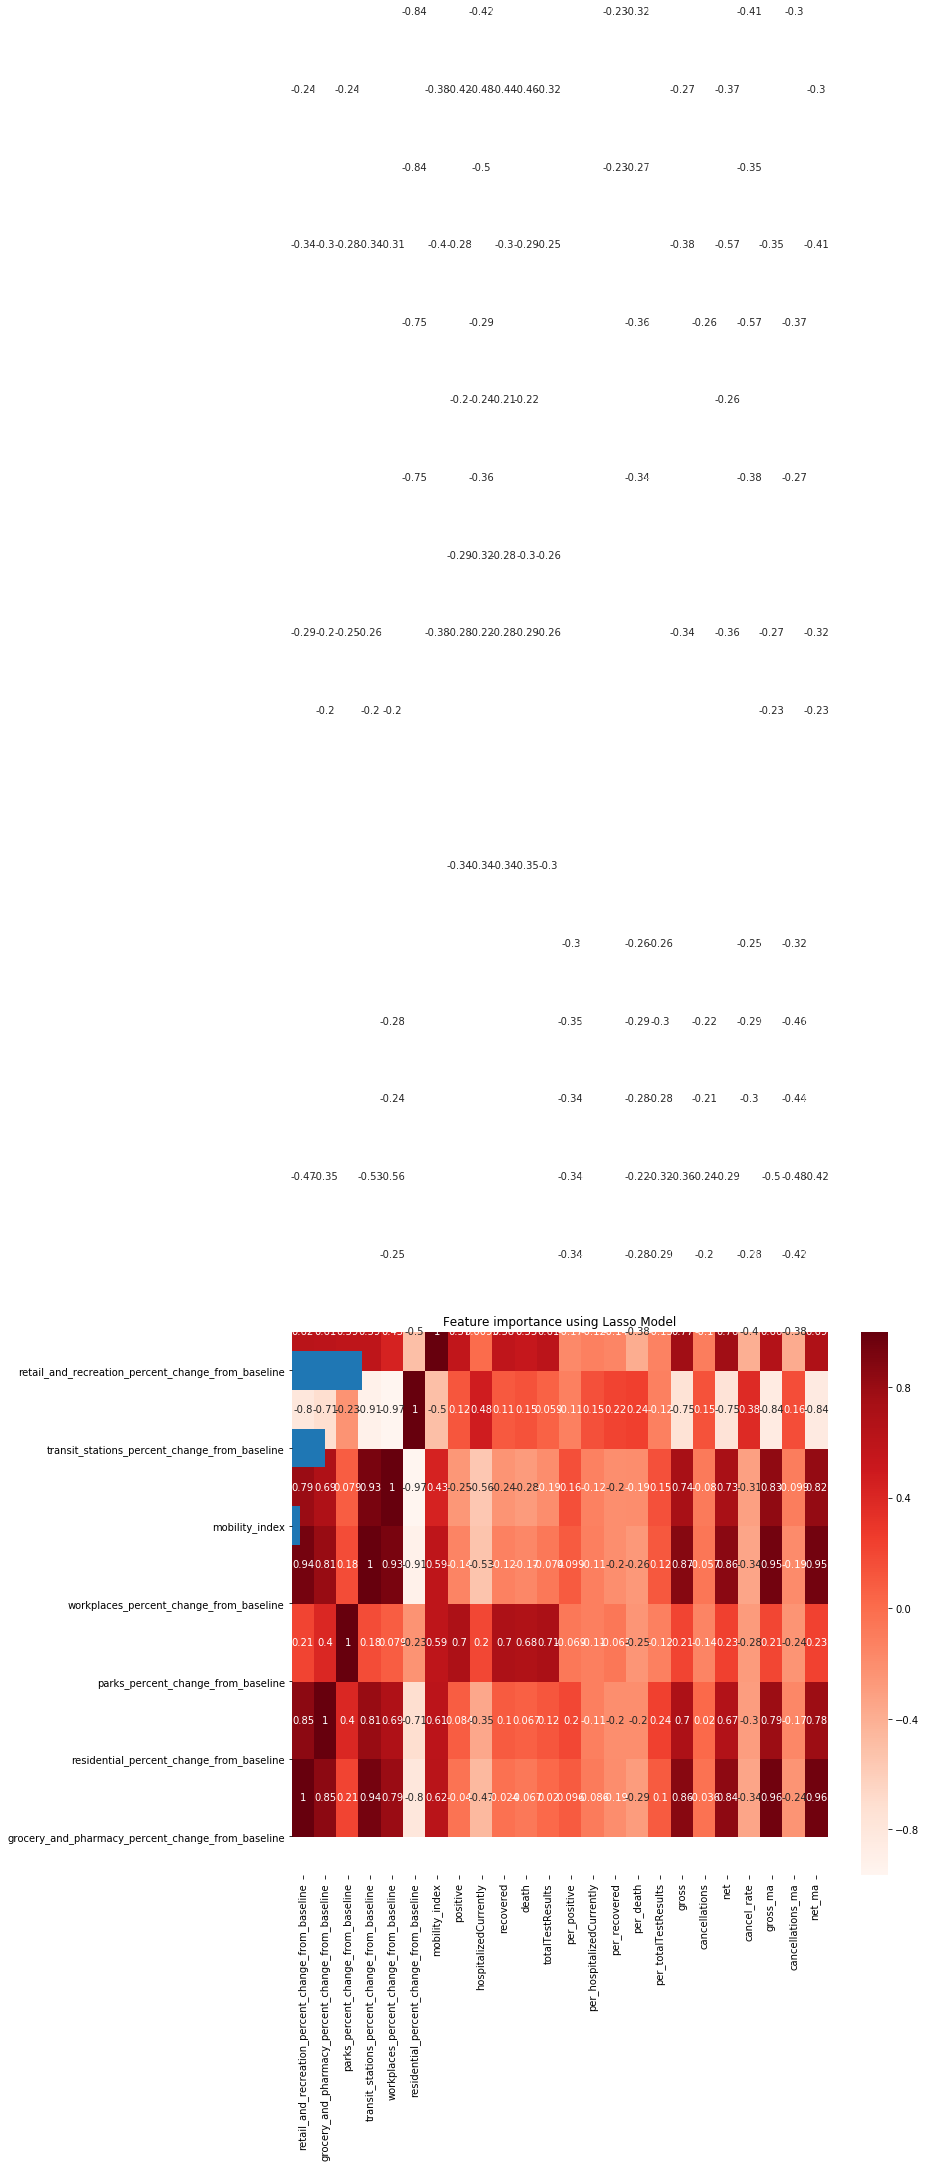

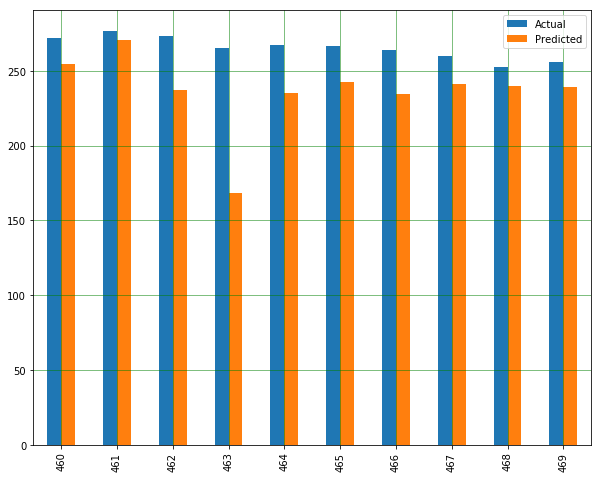

('Intercept: \n', 278.93360513088993)
('Root Mean Square Error \n', 37.89621625040599)
('R^2 Value: \n', -25.963421719473544)
My MAPE: 10.9397227811


In [69]:
# 8. Virginia
# Read CSV train data
df = pd.read_csv(r"C:\Users\aravindh.saravanan\Desktop\train_ma.csv")
df['date'] = pd.to_datetime(df['date'])

data = df[df['state']=='Virginia']
data = data.drop("state",1)
data = data.drop("date",1)

# Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

#Selecting highly correlated features with output variable
cor_target = abs(cor["gross_ma"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

# Lasso Regression with Gross Transaction
x=data.iloc[:,0:7]
y=data["gross_ma"]

# Lasso Regression
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

#Removing columns based on feature importance results
x = x.drop(["workplaces_percent_change_from_baseline"],1)
x.head()

model = linear_model.LinearRegression()
model.fit(x, y)

coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

df_test = pd.read_csv(r"C:\Users\aravindh.saravanan\Desktop\test_ma.csv")
df_test['date'] = pd.to_datetime(df_test['date'])
data_test = df_test[df_test['state']=='Virginia']
data_test = data_test.drop("state",1)
data_test = data_test.drop("date",1)
data_test.head(10)

x_test=data_test.iloc[:,0:7]
x_test = x_test.drop(["workplaces_percent_change_from_baseline"],1)
y_test=data_test["gross_ma"]

y_pred = model.predict(x_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head(10))

df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(y_test, y_pred))      
r2_value = r2_score(y_test, y_pred)                     

print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)

def MAPE(predict,target):
    return ( abs((y_test - y_pred) / y_test).mean()) * 100
print ('My MAPE: ' + str(MAPE(y_pred,y)) )

Best alpha using built-in LassoCV: 2.225608
Best score using built-in LassoCV: 0.950017
Lasso picked 7 variables and eliminated the other 0 variables
                                                    Coefficient
retail_and_recreation_percent_change_from_baseline     1.074834
grocery_and_pharmacy_percent_change_from_baseline      0.769171
parks_percent_change_from_baseline                    -0.452763
transit_stations_percent_change_from_baseline          3.581593
residential_percent_change_from_baseline               0.323746
mobility_index                                         0.242484
    Actual   Predicted
50  253.71  220.085374
51  260.29  229.622089
52  264.14  202.790882
53  254.86  160.942737
54  250.00  196.661883
55  251.00  205.117623
56  249.71  212.779742
57  251.14  206.495335
58  248.14  205.282773
59  248.29  212.031915


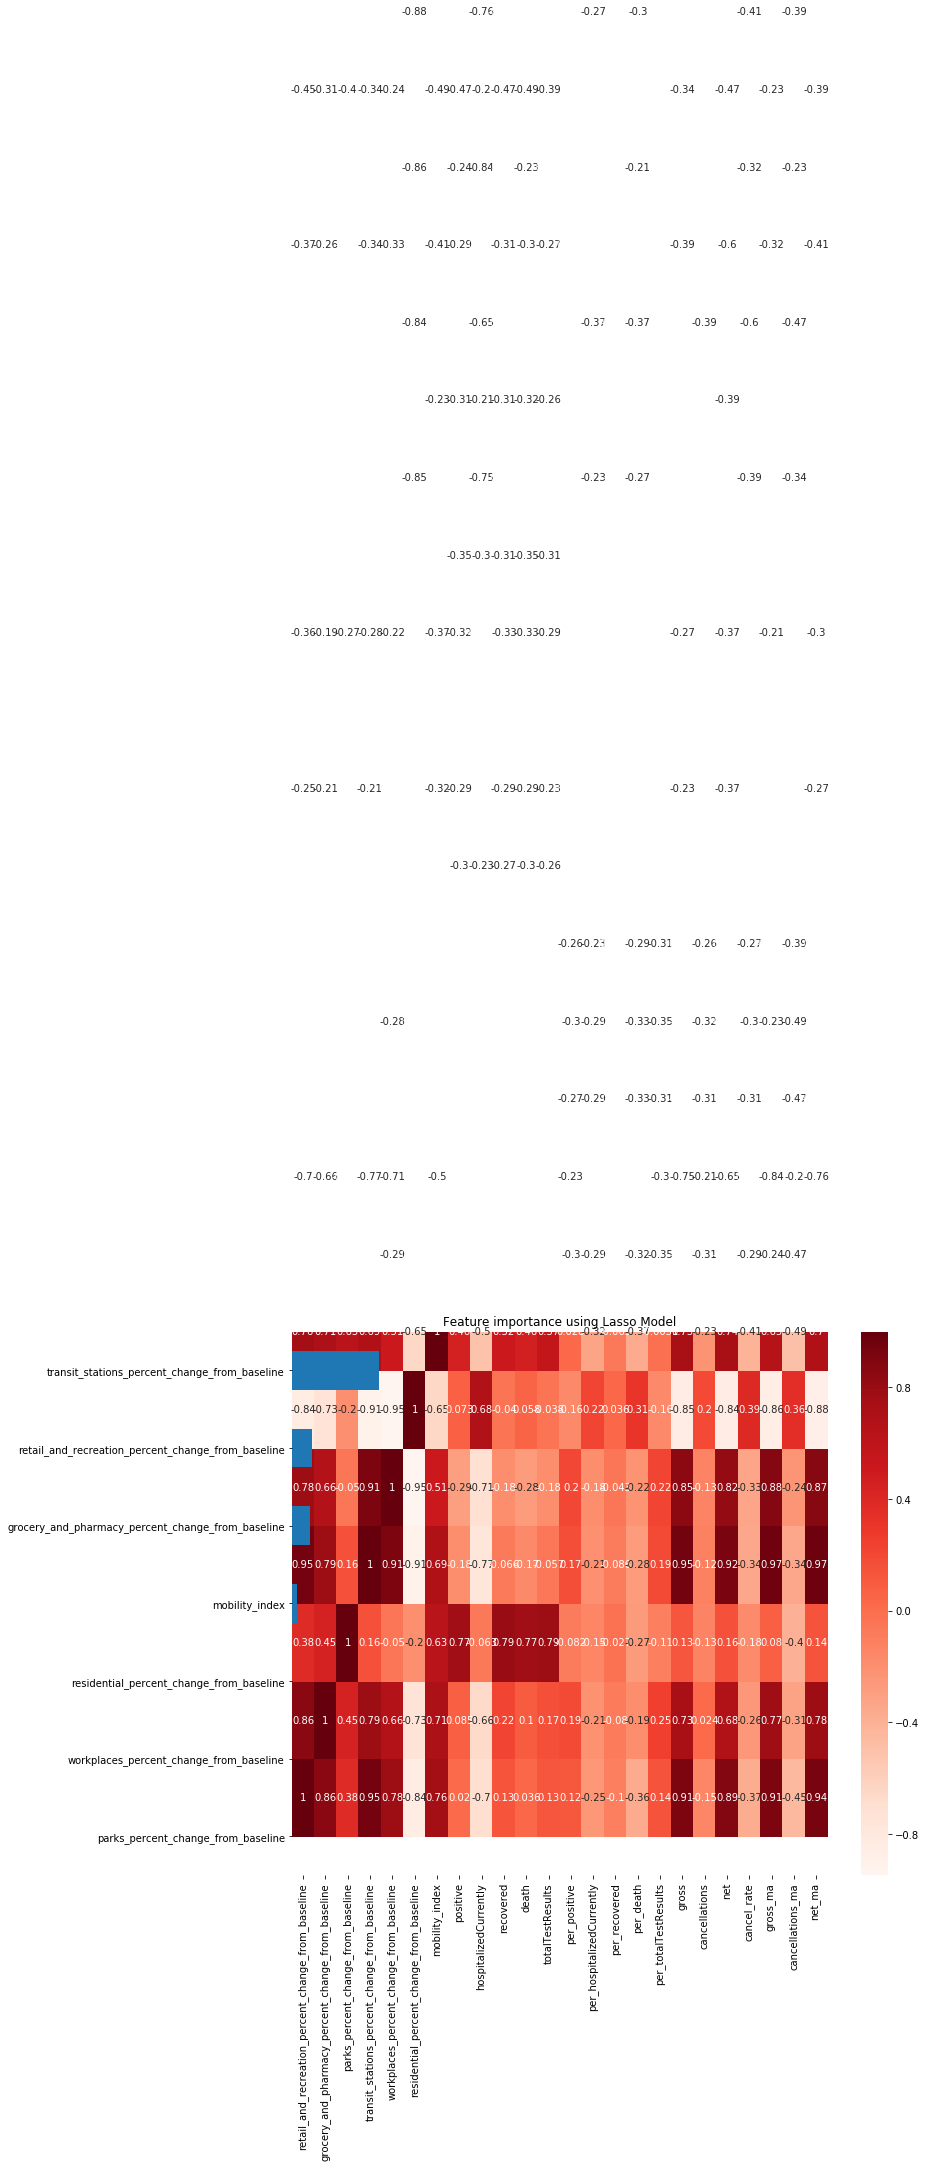

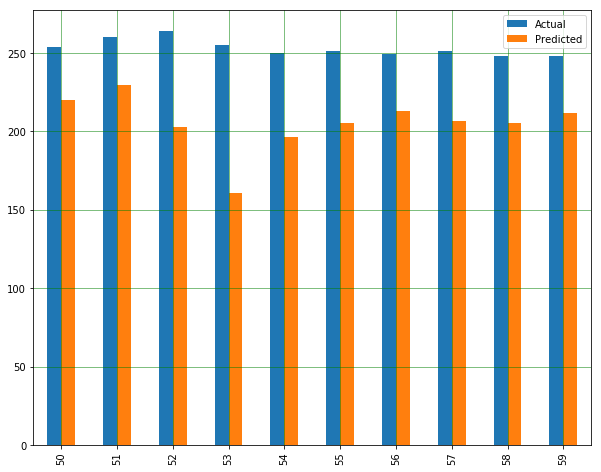

('Intercept: \n', 315.4132182075536)
('Root Mean Square Error \n', 51.10169340203301)
('R^2 Value: \n', -101.75737629745629)
My MAPE: 18.9167547876


In [70]:
# 9. Colorado
# Read CSV train data
df = pd.read_csv(r"C:\Users\aravindh.saravanan\Desktop\train_ma.csv")
df['date'] = pd.to_datetime(df['date'])

data = df[df['state']=='Colorado']
data = data.drop("state",1)
data = data.drop("date",1)

# Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

#Selecting highly correlated features with output variable
cor_target = abs(cor["gross_ma"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

# Lasso Regression with Gross Transaction
x=data.iloc[:,0:7]
y=data["gross_ma"]

# Lasso Regression
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

#Removing columns based on feature importance results
x = x.drop(["workplaces_percent_change_from_baseline"],1)
x.head()

model = linear_model.LinearRegression()
model.fit(x, y)

coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

df_test = pd.read_csv(r"C:\Users\aravindh.saravanan\Desktop\test_ma.csv")
df_test['date'] = pd.to_datetime(df_test['date'])
data_test = df_test[df_test['state']=='Colorado']
data_test = data_test.drop("state",1)
data_test = data_test.drop("date",1)
data_test.head(10)

x_test=data_test.iloc[:,0:7]
x_test = x_test.drop(["workplaces_percent_change_from_baseline"],1)
y_test=data_test["gross_ma"]

y_pred = model.predict(x_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head(10))

df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(y_test, y_pred))      
r2_value = r2_score(y_test, y_pred)                     

print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)

def MAPE(predict,target):
    return ( abs((y_test - y_pred) / y_test).mean()) * 100
print ('My MAPE: ' + str(MAPE(y_pred,y)) )

Best alpha using built-in LassoCV: 1.492019
Best score using built-in LassoCV: 0.941848
Lasso picked 7 variables and eliminated the other 0 variables
                                                    Coefficient
retail_and_recreation_percent_change_from_baseline     1.675235
grocery_and_pharmacy_percent_change_from_baseline     -0.954983
parks_percent_change_from_baseline                    -0.293964
transit_stations_percent_change_from_baseline          2.745583
residential_percent_change_from_baseline              -2.335481
mobility_index                                         0.065201
     Actual   Predicted
350  245.43  224.028500
351  244.57  221.031634
352  247.43  152.840508
353  236.29  134.208012
354  236.86  210.058988
355  241.43  216.467003
356  242.86  211.060065
357  233.00  211.549730
358  229.71  199.293806
359  230.14  194.139614


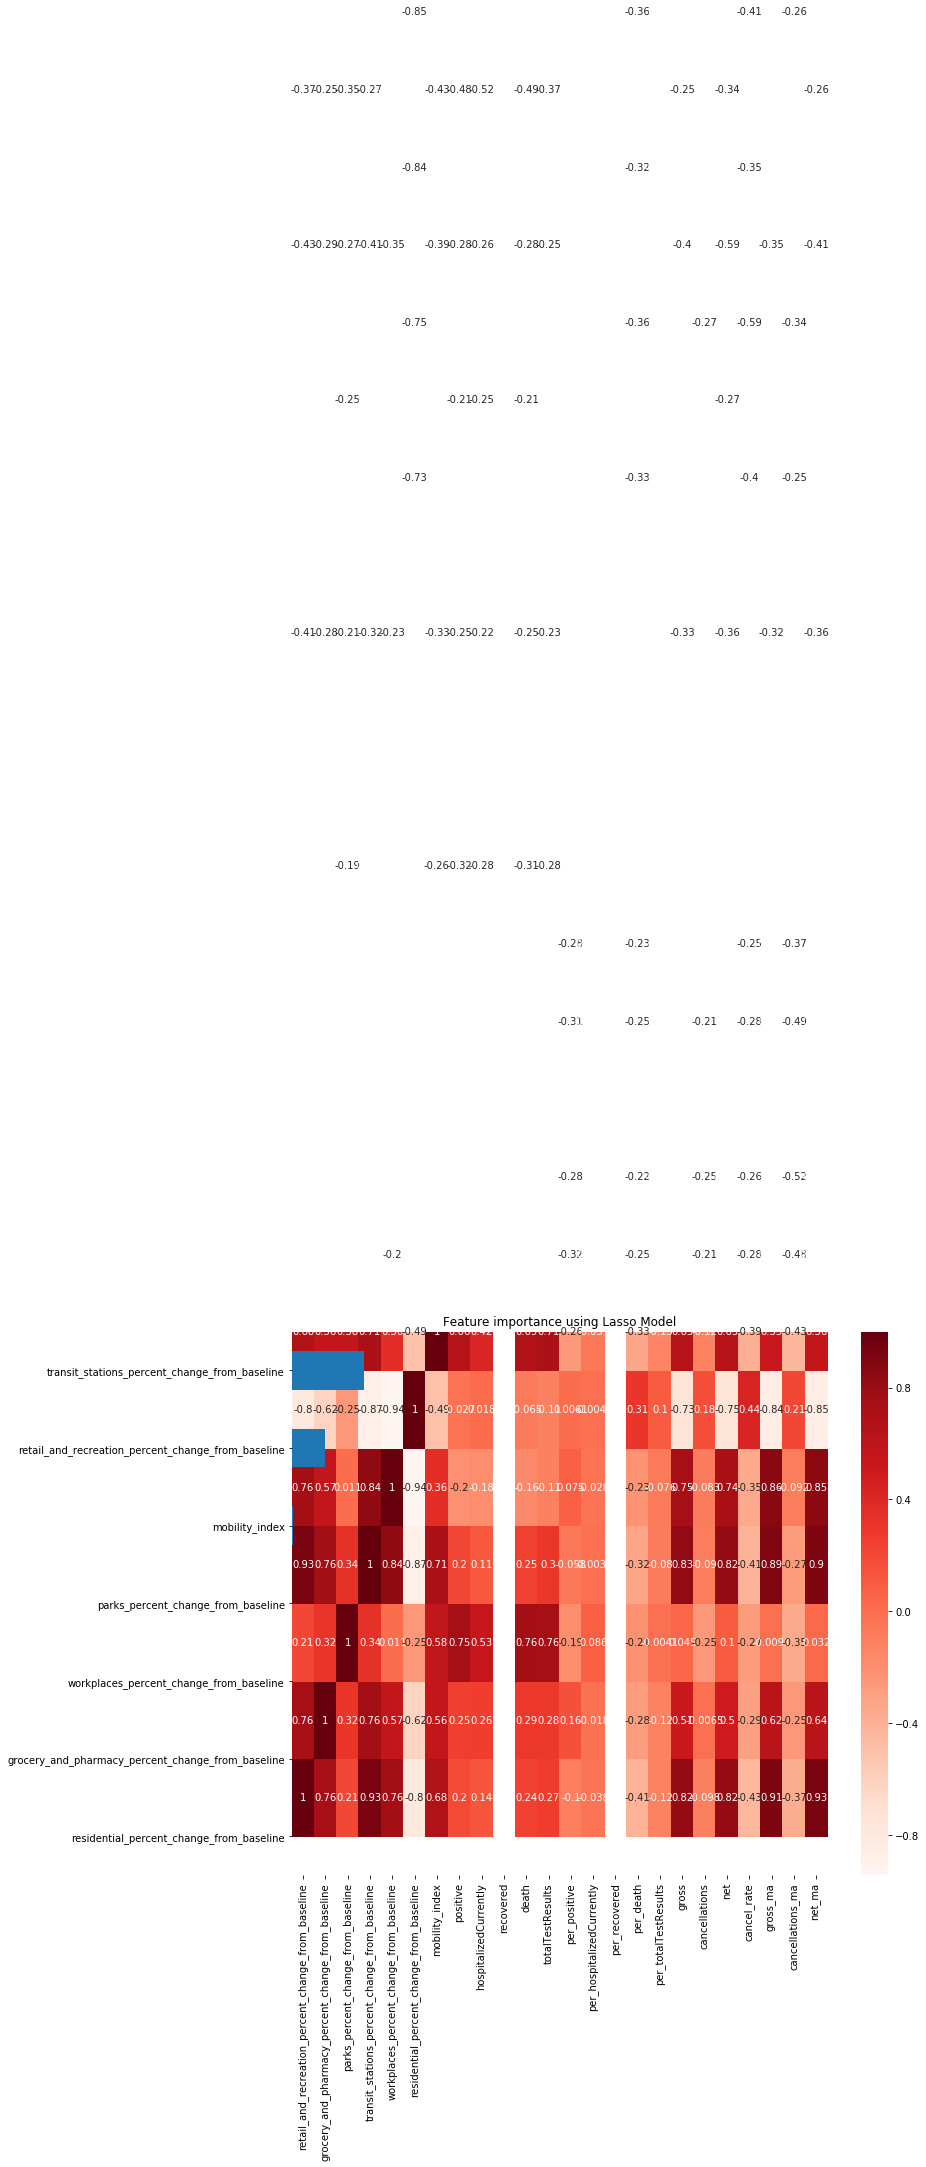

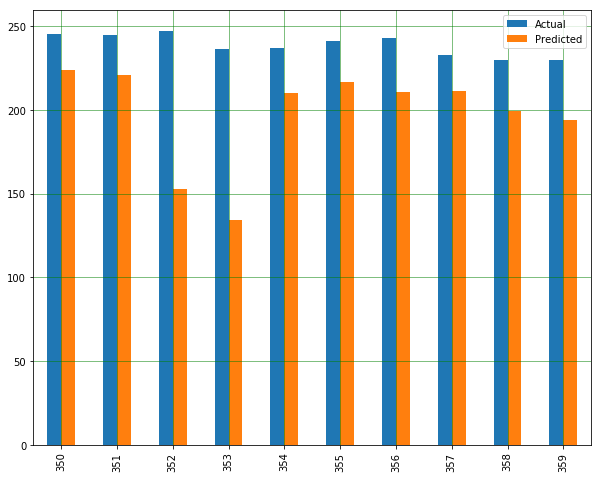

('Intercept: \n', 276.6696440426651)
('Root Mean Square Error \n', 50.41225166135477)
('R^2 Value: \n', -66.5100807765689)
My MAPE: 17.2613949329


In [71]:
# 10. Ohio
# Read CSV train data
df = pd.read_csv(r"C:\Users\aravindh.saravanan\Desktop\train_ma.csv")
df['date'] = pd.to_datetime(df['date'])

data = df[df['state']=='Ohio']
data = data.drop("state",1)
data = data.drop("date",1)

# Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

#Selecting highly correlated features with output variable
cor_target = abs(cor["gross_ma"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

# Lasso Regression with Gross Transaction
x=data.iloc[:,0:7]
y=data["gross_ma"]

# Lasso Regression
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

#Removing columns based on feature importance results
x = x.drop(["workplaces_percent_change_from_baseline"],1)
x.head()

model = linear_model.LinearRegression()
model.fit(x, y)

coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

df_test = pd.read_csv(r"C:\Users\aravindh.saravanan\Desktop\test_ma.csv")
df_test['date'] = pd.to_datetime(df_test['date'])
data_test = df_test[df_test['state']=='Ohio']
data_test = data_test.drop("state",1)
data_test = data_test.drop("date",1)
data_test.head(10)

x_test=data_test.iloc[:,0:7]
x_test = x_test.drop(["workplaces_percent_change_from_baseline"],1)
y_test=data_test["gross_ma"]

y_pred = model.predict(x_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head(10))

df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(y_test, y_pred))      
r2_value = r2_score(y_test, y_pred)                     

print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)

def MAPE(predict,target):
    return ( abs((y_test - y_pred) / y_test).mean()) * 100
print ('My MAPE: ' + str(MAPE(y_pred,y)) )